[![Banner-Modelos.png](https://i.postimg.cc/RCgy2XdL/Banner-Modelos.png)](https://postimg.cc/PN8SwbBC)

## L3: Árboles de decisión. Búsqueda de hiperparámetros y evaluación.

El objetivo de este notebook es aplicar los conocimientos adquiridos sobre búsqueda de hiperparámetros con técnicas de validación y evaluación de modelos utilizando métricas para clasificación, en la construcción de árboles de decisión. Se explicará, paso a paso, como: 

1. Preparar los datos para el modelado.
2. Crear un modelo de árbol de decisión.
3. Utilizar técnicas de validación para el ajuste de hiperparámetros propios de árboles de decisión.
4. Evaluar el modelo.

El ejemplo que será utilizado, de acuerdo con el caso de uso del sector retail, está relacionado con la deserción de empleados.

Además, puedes utilizar este notebook como guía para la solución de los problemas que se propongan en los ejercicios prácticos y para el proyecto.

###### Autores: David Ocampo (d.ocampo@uniandes.edu.co), Julián Montoya (jc.montoyar@uniandes.edu.co)

### 1. Importación de librerías 

En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso.

In [1]:
# Librerías para manejo de datos
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import accuracy_score
# Para el reporte de rendimiento con métricas de clasificación 
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt

### 2. Carga de los datos
A través de la librería **pandas** podemos realizar la carga de datos desde diferentes fuentes de información, en este caso se realizará la carga de un archivo plano csv (archivo separado por comas).

In [2]:
# Se cargan los datos. 
data=pd.read_csv('Datos_C2_Modelos_M4.csv', sep=';', encoding = 'utf-8')

In [3]:
# Cantidad de datos y número de variables
data.shape

(1470, 17)

In [4]:
# Mostrar los datos
data.head()

,Edad,Renuncia,Viaje_negocio,Distacia_desde_casa,Satisfacción_ambiente,Género,Nivel_trabajo,Estatus_marital,Salario_mensual,No_Compañías_anteriores,Sobretiempo,Satisfacción_relaciones,Años_trabajo,Antigüedad,Años_cargo_actual,Última_promoción,Años_manager_actual
0,41,SI,Ocasional,1,2,Femenino,2,Soltero,5993,8,SI,1,8,6,4,0,5
1,49,NO,Frecuentemente,8,3,Masculino,2,Casado,5130,1,NO,4,10,10,7,1,7
2,37,SI,Ocasional,2,4,Masculino,1,Soltero,2090,6,SI,2,7,0,0,0,0
3,33,NO,Frecuentemente,3,4,Femenino,1,Casado,2909,1,SI,3,8,8,7,3,0
4,27,NO,Ocasional,2,1,Masculino,1,Casado,3468,9,NO,4,6,2,2,2,2


### 2. Limpieza y preparación de los datos

Primero vamos a ejecutar los pasos de limpieza de los datos, relacionados con la eliminación de registros con ausencias y duplicados.

In [5]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
data_t = data
# Eliminación data vacía
data_t=data_t.dropna()
# Eliminación de registros duplicados.
data_t=data_t.drop_duplicates()

Un aspecto muy importante para tener en cuenta son los requerimientos de entrada de los algoritmos de aprendizaje implementados en las librerías utilizadas. En particular, scikit-learn requiere que todos los atributos sean numéricos y que la variable objetivo esté codificada con números.

In [6]:
# Transformación de las variables de entrada.
data_t = pd.get_dummies(data_t, columns=['Viaje_negocio','Género', 'Estatus_marital', 'Sobretiempo' ])

In [7]:
# Para hacer la transformación o codificación de la variable objetivo utilizaremos la función labelEncoder. Es importante 
# que tengas en cuenta que, aunque la representación de esta variable sea numérica, la tarea a resolver seguirá siendo 
# una clasificación.
# Primero tenemos que generar el objeto
codificacion = LabelEncoder()
# Ahora se ajusta a los datos
data_t['Renuncia']=codificacion.fit_transform(data_t['Renuncia'])

In [8]:
# Podemos ver cómo quedaron nuestro datos
data_t.head()

,Edad,Renuncia,Distacia_desde_casa,Satisfacción_ambiente,Nivel_trabajo,Salario_mensual,No_Compañías_anteriores,Satisfacción_relaciones,Años_trabajo,Antigüedad,...,Viaje_negocio_Frecuentemente,Viaje_negocio_No-viaja,Viaje_negocio_Ocasional,Género_Femenino,Género_Masculino,Estatus_marital_Casado,Estatus_marital_Divorciado,Estatus_marital_Soltero,Sobretiempo_NO,Sobretiempo_SI
0,41,1,1,2,2,5993,8,1,8,6,...,0,0,1,1,0,0,0,1,0,1
1,49,0,8,3,2,5130,1,4,10,10,...,1,0,0,0,1,1,0,0,1,0
2,37,1,2,4,1,2090,6,2,7,0,...,0,0,1,0,1,0,0,1,0,1
3,33,0,3,4,1,2909,1,3,8,8,...,1,0,0,1,0,1,0,0,0,1
4,27,0,2,1,1,3468,9,4,6,2,...,0,0,1,0,1,1,0,0,1,0


In [9]:
#revisión del total de registros
data_t.shape

(1470, 23)

### 3. Construcción del modelo

Los algoritmos supervisados implementados en scikit-learn requieren que las variables de entrada estén separadas de la variable objetivo. 

In [10]:
# Se selecciona la variable objetivo, en este caso "Renuncia".
Y=data_t['Renuncia']
# Del conjunto de datos se elimina la variable "Renuncia".
X=data_t.drop(['Renuncia'], axis=1)

In [11]:
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [12]:
# Crear el objeto de arbol de decisión. Utilicemos como criterio de pureza la entropía.
arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [13]:
# Entrenar el modelo de arbol de decisión con los datos de entrenamiento
arbol = arbol.fit(X_train,Y_train)

Para determinar el rendimiento del modelo podemos en primer lugar, generar la matriz de confusión.

In [14]:
# Determinamos las predicciones del modelo sobre el conjunto test.
y_pred = arbol.predict(X_test)

In [15]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[212,  33],
       [ 33,  16]], dtype=int64)

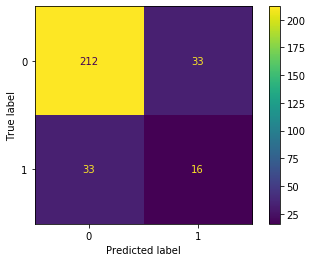

In [16]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(arbol, X_test, Y_test)  
plt.show()  

También podemos generar diferentes métricas de rendimiento, como el recall, la precisión y la puntuación F1. 

In [17]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.78
Recall: 0.32653061224489793
Precisión: 0.32653061224489793
Puntuación F1: 0.32653061224489793


Para tener una panorama completo podemos generar un reporte.

In [18]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       245
           1       0.33      0.33      0.33        49

    accuracy                           0.78       294
   macro avg       0.60      0.60      0.60       294
weighted avg       0.78      0.78      0.78       294



Podemos observar que, a pesar de que la medida global de exactitud ofrece un rendimiento de 78% de clasificaciones correctas, este no se refleja en la clase minoritaria (Renuncia = 1). Esto es debido al desbalance entre las clases. 

En general, el desbalance entre las clases en un conjunto de datos puede presentarse por diversas razones, algunas de ellas relacionadas con la naturaleza del problema, donde este desbalance es el resultado directo de las características de la población que genera los datos o el costo y/o dificultad en la obtención de datos de la clase de interés. 

En estos escenarios es muy importante obtener modelos que exhiban un buen rendimiento de predicción sobre la clase minoritaria ya que esta, por lo general, representa el objetivo o target de la tarea de clasificación. Sin embargo, los algoritmos de aprendizaje tradicionales tenderán a producir una solución que sólo tendrá un buen desempeño sobre la clase mayoritaria. Esto es debido a que están diseñados para inducir un modelo de clasificación basado en el error que se comete sobre todo el conjunto de entrenamiento, sin tomar en cuenta la representatividad o balance de las clases.

Para resolver este problema se han propuesto diversas estrategias como el remuestreo del conjunto de datos o la construcción de clasificadores que tomen en cuenta el costo de los errores sobre las diferentes clases. En particular, para árboles de decisión, scikit-learn ofrece la posibilidad de indicarle al algoritmo que maneje el desbalance internamente con el parámetro "class_weight". Veamos como usarlo:

In [19]:
# Crear el objeto de arbol de decisión. Utilicemos como criterio de pureza la entropía.
arbol = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', random_state=0)
arbol = arbol.fit(X_train,Y_train)
y_pred = arbol.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       245
           1       0.34      0.35      0.34        49

    accuracy                           0.78       294
   macro avg       0.60      0.61      0.61       294
weighted avg       0.78      0.78      0.78       294



Vemos que mejora un poco el rendimiento sobre la clase minoritaria. También podrías aplicar técnicas de remuestreo, pero su estudio está fuera del alcance de este curso. Sin embargo, para mayor información puedes revisar el siguiente enlace "https://imbalanced-learn.org/stable/".

### 4. Construcción del modelos con búsqueda de hiperparámetros.
En el caso de los árboles de decisión los hiperparámetros principales que hay que ajustar están relacionados con aquellos que controlan la complejidad, pero también el criterio o medida de pureza puede afectar su rendimiento. En general, estos son:  

* **criterion** : {“gini”, “entropy”}, predeterminado = "gini".

La función para medir la calidad de una división. Los criterios admitidos son "gini" y "entropía".

* **max_depth:** int, predeterminado=None.

La profundidad máxima del árbol. Si es None, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de min_samples_split muestras.

* **min_samples_split** : int or float, predeterminado=2.

El número mínimo de muestras necesarias para dividir un nodo interno

Para determinar los mejores valores de estos hiperparámetros vamos a realizar la búsqueda utilizando la función GridSearchCV.

In [20]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [21]:
# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10],'min_samples_split':[2, 3, 4, 5]}

In [22]:
# Definimos el modelo sin ningún valor de estos hiperparámetros
arbol = DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [23]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'min_samples_split': [2, 3, 4, 5]})

In [24]:
# Podemos ver cual fue el resultado de la búsqueda (mejores valores de hiperparámetros)
mejor_modelo.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}

In [25]:
# Obtener el mejor modelo.
modelo_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred = modelo_final.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       245
           1       0.34      0.45      0.39        49

    accuracy                           0.77       294
   macro avg       0.61      0.64      0.62       294
weighted avg       0.79      0.77      0.78       294



### 5. Predicciones y probabilidad

Una vez obtenido el modelo de árbol de decisión también podríamos obtener la probabilidad de que un dato sea clasificado como de una clase particular. 

In [26]:
# Por ejemplo, tomemos un dato del conjunto de test y apliquemos el método "predict_proba".
y_pred_test = modelo_final.predict_proba(X_test.iloc[[20]])

In [27]:
print(y_pred_test)

[[0.10801051 0.89198949]]


In [28]:
# Para saber el orden de las clases puedes utilizar el atributo "classes_" del modelo:
modelo_final.classes_

array([0, 1])

[![Banner-Modelos.png](https://i.postimg.cc/RCgy2XdL/Banner-Modelos.png)](https://postimg.cc/PN8SwbBC)